In [59]:
import retro
import scipy.misc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [ 10, 5 ]
import os
import numpy as np
import time
import cv2 as cv

from TemplateMatcher import TemplateMatcher

env = None

In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [53]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1')
_ = env.reset()

frame, reward, done, info = env.step( env.action_space.sample() )

In [54]:
sonic_dir = 'data/sonic2/sonic'
sonic_files = os.listdir( sonic_dir )
sonic_files.sort()
sonics = [ scipy.misc.imread( os.path.join( sonic_dir, sonic_file ), mode='RGBA' ) for sonic_file in sonic_files ]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [55]:
def imageTo8BitColor( image ):
    assert image.shape[ -1 ] == 3 or image.shape[ -1 ] == 4
    
    output_image = np.zeros( image.shape[ 0 : 2 ], dtype=np.uint8 )

    output_image[ :, : ]  = ( image[ :, :, 0 ] / 32 ).astype( np.uint8 ) * 32 # << 4
    output_image[ :, : ] += ( image[ :, :, 1 ] / 32 ).astype( np.uint8 ) * 4  # << 2 
    output_image[ :, : ] += ( image[ :, :, 2 ] / 64 ).astype( np.uint8 )
    
    alpha = None
    if image.shape[ -1 ] == 4:
        alpha = image[ :, :, 3 ]

    return output_image, alpha

In [56]:
class EightBitTemplateMatching( TemplateMatcher ):
    def preprocessFrame( self, frame ):
        return imageTo8BitColor( frame )[ 0 ]

    def preprocessTemplate( self, template ):
        return imageTo8BitColor( template )

256 2
80 77 0 0 80 77 107 119
(80, 77) (107, 119)
0.015328999999997706
after


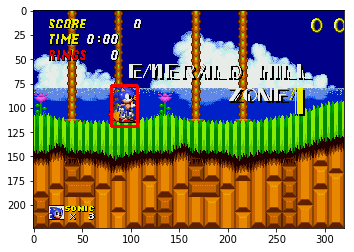

In [57]:
matcher = EightBitTemplateMatching( sonics )
print( len( matcher._processed_templates ), len( matcher._processed_templates[ 0 ] ) )
start_time = time.clock()
store, tl, br, _ = matcher.matchTemplate( frame )
print( tl, br )
print( time.clock() - start_time )
print( 'after' )

frame_copy = frame.copy()
cv.rectangle( frame_copy, tl, br, 255, 2 )
plt.imshow( frame_copy )

before
before
(80, 77)
5 5 72 75 80 77 107 119
(80, 77) (107, 119)


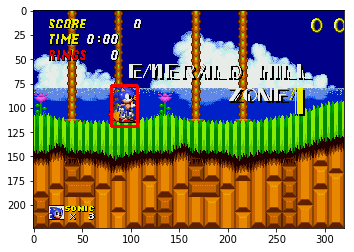

In [58]:
print( 'before' )
start_time = time.clock()
print( 'before' )
results = matcher.matchTemplate( frame, ( tl, br ) )

print( results[ 1 ], results[ 2 ] )

cv.rectangle( frame, results[ 1 ], results[ 2 ], 255, 2 )

plt.imshow( frame )

# print( time.clock() - start_time )